<a href="https://colab.research.google.com/github/Karthik01018/Clustering-with-K-Means/blob/main/Clustering_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


**Load the dataset**

In [3]:
file_path = "/content/Mall_Customers.csv"
df = pd.read_csv(file_path)

**Select relevant features**

In [4]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]


**Standardize the data**

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Reduce dimensions for visualization**

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

**Elbow Method to find optimal K**

In [7]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

**Plot Elbow Method**

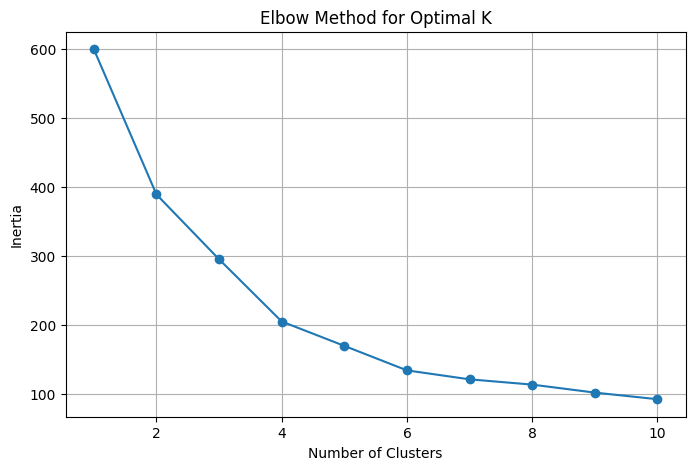

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**Try K values from 2 to 10 and evaluate using Silhouette Score**

In [9]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

*Plot Silhouette Scores*

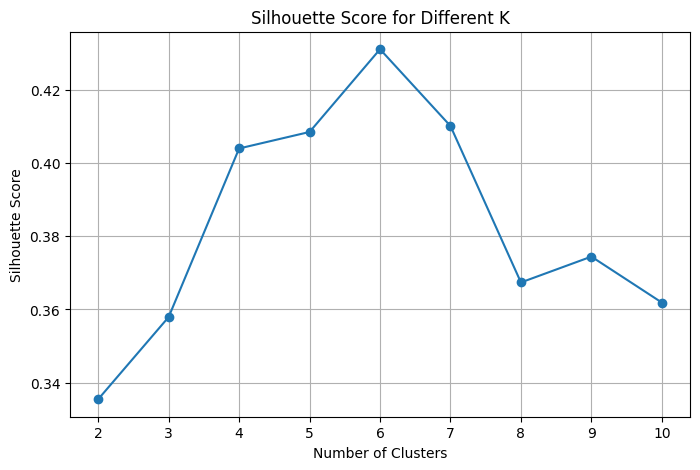

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()